# possible answers: by using a simulated data

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline
from sklearn import preprocessing
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error
from math import sqrt

In [49]:
df = pd.DataFrame(np.random.randn(100, 4), columns=list('ABCD'))

In [71]:
# let's create price using bottom Formula
df['price'] = 1.2 + 0.9*df['A'] -0.65*df['B']+1.3*df['C'] - 0.005*df['D']

In [72]:
df

,A,B,C,D,price
0,-0.021937,-0.100397,1.984511,0.213921,3.824309
1,-1.368836,-0.076158,0.073464,-0.778512,0.116946
2,-0.360144,1.518440,-0.696123,2.020400,-1.026177
3,-1.373076,-0.914809,-0.056573,-0.349655,0.487062
4,-2.071789,-0.914867,0.095365,0.023687,0.053910
5,-0.729684,-1.283658,-0.240843,0.000130,1.064565
6,0.656033,-0.274848,-0.140122,-0.183422,1.787839
7,1.522235,0.445835,1.419923,-1.310535,4.132671
8,-0.435067,1.533551,-0.399575,-0.115183,-0.707240
9,-1.303630,-0.083242,-0.737467,1.112737,-0.883430


In [52]:
df_scale = pd.DataFrame(sklearn.preprocessing.scale(df[['A','B','C','D']],axis=0, with_mean=True, with_std=True), columns=list('ABCD'))

In [53]:
df_scale

,A,B,C,D
0,-0.008310,-0.053624,1.798396,0.138595
1,-1.344304,-0.028952,-0.076123,-0.829270
2,-0.343778,1.594140,-0.831001,1.900353
3,-1.348509,-0.882588,-0.203674,-0.411030
4,-2.041566,-0.882647,-0.054641,-0.046930
5,-0.710327,-1.258028,-0.384423,-0.069904
6,0.664171,-0.231192,-0.285627,-0.248912
7,1.523360,0.502369,1.244600,-1.348122
8,-0.418095,1.609521,-0.540121,-0.182362
9,-1.279626,-0.036162,-0.871554,1.015160


In [54]:
np.mean(df_scale)
#mean ~ 0

A    3.774758e-17
B   -2.775558e-17
C    1.332268e-17
D    6.661338e-18
dtype: float64

In [73]:
np.std(df_scale)
#standard deviation ~ 1

A    1.0
B    1.0
C    1.0
D    1.0
dtype: float64

In [56]:
results = smf.ols('price ~ A + B + C + D', data=df).fit()

In [57]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.275e+32
Date:                Mon, 19 Nov 2018   Prob (F-statistic):               0.00
Time:                        22:58:07   Log-Likelihood:                 3332.3
No. Observations:                 100   AIC:                            -6655.
Df Residuals:                      95   BIC:                            -6642.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2000   8.49e-17   1.41e+16      0.0

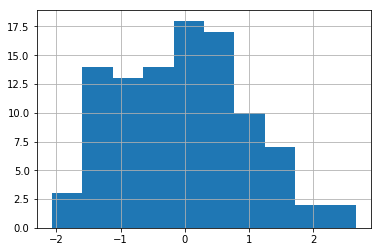

In [78]:
df.A.hist()

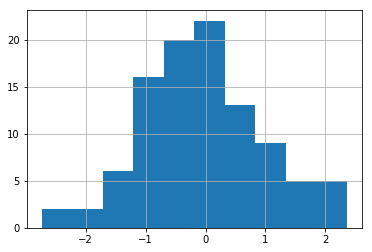

In [79]:
df.B.hist()

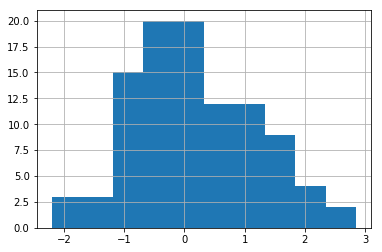

In [80]:
df.C.hist()

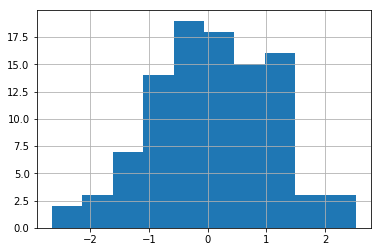

In [81]:
df.D.hist()

(array([3., 0., 0., 1., 1., 9., 3., 1., 4., 4., 4., 4., 3., 6., 3., 4., 6.,
        6., 5., 5., 3., 5., 3., 2., 3., 2., 3., 1., 3., 0., 1., 0., 0., 0.,
        1., 1.]),
 array([-2.07178897, -1.94020132, -1.80861366, -1.67702601, -1.54543835,
        -1.4138507 , -1.28226305, -1.15067539, -1.01908774, -0.88750009,
        -0.75591243, -0.62432478, -0.49273713, -0.36114947, -0.22956182,
        -0.09797416,  0.03361349,  0.16520114,  0.2967888 ,  0.42837645,
         0.5599641 ,  0.69155176,  0.82313941,  0.95472707,  1.08631472,
         1.21790237,  1.34949003,  1.48107768,  1.61266533,  1.74425299,
         1.87584064,  2.00742829,  2.13901595,  2.2706036 ,  2.40219126,
         2.53377891,  2.66536656]),
 <a list of 36 Patch objects>)

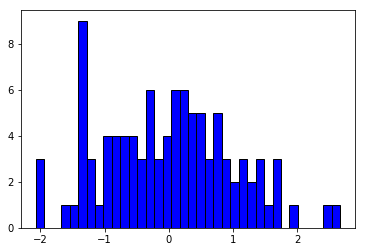

In [82]:
#matplotlib histogram
plt.hist(df['A'], color = 'blue', edgecolor = 'black',
         bins = int(180/5))

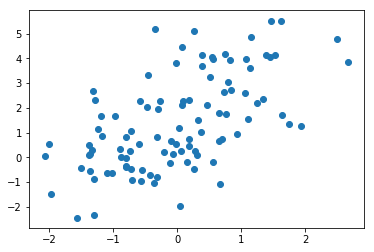

In [77]:
plt.scatter(y='price',x='A',data=df)

In [74]:
#split data into 70% training and 30% test
y = df['price']
x = df[['A','B','C','D']]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
       

In [75]:
X_train

,A,B,C,D
41,-0.803907,-0.302580,0.101745,-0.501059
85,-0.709806,0.001458,-1.143499,-0.556965
51,2.665367,0.987025,0.679032,1.055745
5,-0.729684,-1.283658,-0.240843,0.000130
48,-1.341057,-0.032308,0.208094,1.285137
54,-0.102429,-0.215140,-0.451156,0.027029
96,0.329054,-0.658375,-0.318347,-1.099189
26,1.743477,0.329918,-0.930375,-1.445340
95,-1.301706,-0.793837,-2.199206,2.358733
24,1.149366,-0.701682,1.656113,-0.895813


In [60]:
y_train

98   -0.344004
38    5.523300
91    3.029467
50    5.490373
51    3.834727
4     0.053910
42    2.725094
97    4.474290
31    1.182591
23    1.677389
10   -0.796377
76    3.322785
36    0.244744
25   -0.486666
17    1.735412
93    0.936448
59    0.529571
3     0.487062
45    3.977713
57    0.120814
39   -1.950665
18   -0.410602
88    0.323016
1     0.116946
83    0.753743
21    0.474024
81    0.208057
13    1.962810
73   -0.637716
0     3.824309
        ...   
8    -0.707240
28    2.688913
27   -0.198479
48    0.278145
90   -0.634232
77    1.729111
12    1.148224
64    4.138477
7     4.132671
74    0.841021
49    4.069627
84   -0.212971
58    1.653991
78   -0.371520
86    0.028769
2    -1.026177
11    0.547453
79    2.582834
69   -0.508372
19    3.919068
37    4.043177
99    5.113692
26    1.352422
61   -0.180970
14   -0.532263
29    3.244526
32    1.552848
33    2.314216
5     1.064565
22   -0.451244
Name: price, Length: 70, dtype: float64

In [76]:
#another way of doing regression in python with using this modules
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)

In [62]:
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [63]:
model.coef_

array([ 0.9  , -0.65 ,  1.3  , -0.005])

In [64]:
model.intercept_

1.1999999999999997

In [65]:
predictions = lm.predict(X_test)

In [66]:
sum(y_test - predictions)

8.03523914072457e-15

In [67]:
rms = sqrt(mean_squared_error(y_test, predictions))

In [68]:
rms

9.468984558068926e-16